In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Collection

### df_products Data Description

`df_products`, contains descriptive information about individual products listed on Amazon. Each row represents a unique product identified by its `id`. The columns provide various attributes of these products, which can be used to understand their characteristics and popularity.

Here's a breakdown of each column:

*   **`id`**:
    *   **Data Type**: Integer
    *   **Description**: Unique identifier for each product. This ID is used to link products in the `df_copurchase` DataFrame, acting as the node identifier in the product network.
    *   **Example**: `1`, `2`, `3`, `4`, `5`, ...

*   **`title`**:
    *   **Data Type**: String (Text)
    *   **Description**: The name or title of the product. This provides a textual description of what the product is.
    *   **Example**: "Patterns of Preaching: A Sermon Sampler", "Candlemas: Feast of Flames", etc.

*   **`group`**:
    *   **Data Type**: String (Categorical)
    *   **Description**:  The category or group the product belongs to. This helps in understanding the product type (e.g., Book, Music, DVD, etc.).
    *   **Example**: "Book"

*   **`salesrank`**:
    *   **Data Type**: Float
    *   **Description**: Amazon sales rank of the product. A lower `salesrank` indicates higher sales and popularity. This is a common metric to gauge how well a product is selling on Amazon.
    *   **Example**: `396585.0`, `168596.0`, `1270652.0`, etc.

*   **`review_cnt`**:
    *   **Data Type**: Integer
    *   **Description**:  The number of customer reviews received for the product. A higher `review_cnt` can indicate greater product visibility, popularity, or customer engagement.
    *   **Example**: `2`, `12`, `1`, `1`, `0`, etc.

*   **`downloads`**:
    *   **Data Type**: Integer
    *   **Description**: The number of downloads associated with the product.  The exact meaning might depend on the dataset source. It could represent digital product downloads, or potentially another engagement metric.  In the context of "Book" products in the example, it might represent sample downloads, or perhaps a different type of engagement relevant to the dataset.
    *   **Example**: `2`, `12`, `1`, `1`, `0`, etc.

*   **`rating`**:
    *   **Data Type**: Float
    *   **Description**: The average customer rating of the product, typically on a scale of 0 to 5 (or similar). This reflects the overall customer satisfaction and perceived quality of the product.
    *   **Example**: `5.0`, `4.5`, `5.0`, `4.0`, `0.0`, etc.

In [3]:
df_products = pd.read_csv('products.csv')

df_products.head()

,id,title,group,salesrank,review_cnt,downloads,rating
0,1,Patterns of Preaching: A Sermon Sampler,Book,396585.0,2,2,5.0
1,2,Candlemas: Feast of Flames,Book,168596.0,12,12,4.5
2,3,World War II Allied Fighter Planes Trading Cards,Book,1270652.0,1,1,5.0
3,4,Life Application Bible Commentary: 1 and 2 Tim...,Book,631289.0,1,1,4.0
4,5,Prayers That Avail Much for Business: Executive,Book,455160.0,0,0,0.0


## df_copurchase Data Description
`df_copurchase` represents the co-purchasing relationships between products. Each row signifies a directed relationship: if a customer purchased the product in the `Source` column, they were also likely to purchase the product in the `Target` column.

Here's a breakdown of each column:

*   **`Source`**:
    *   **Data Type**: Integer
    *   **Description**: Identifier of the product that was initially purchased (product ID-X as described in the project description). This column acts as the source node in the co-purchasing graph. It corresponds to the `id` column in the `df_products` DataFrame.
    *   **Example**: `1`, `1`, `1`, `1`, `2`, ...

*   **`Target`**:
    *   **Data Type**: Integer
    *   **Description**: Identifier of the product that was co-purchased with the 'Source' product (product ID-Y). This column acts as the target node in the co-purchasing graph. It also corresponds to the `id` column in the `df_products` DataFrame.
    *   **Example**: `2`, `4`, `5`, `15`, `11`, ...

In [4]:
df_copurchase = pd.read_csv('copurchase.csv')

df_copurchase.head()

,Source,Target
0,1,2
1,1,4
2,1,5
3,1,15
4,2,11


## Data Exploration

**Pertanyaan untuk df_products:**
1. Correlation Matrix antara salesrank, review count, download, rating

**Pertanyaan untuk df_copurchase:**
1. Jumlah row dalam df_copurchase
   * Berapa banyak total hubungan co-purchasing yang ada dalam dataset? Ini adalah jumlah baris dalam df_copurchase.
2. Top-5 produk yang paling banyak menjadi co-purchasing (source) (out-degree)
   * Produk mana yang paling sering menjadi "Source" dalam df_copurchase? Ini mengindikasikan produk mana yang pembeliannya paling sering diikuti dengan pembelian produk lain. Hitung out-degree setiap node (produk).
   * Visualisasikan top produk dengan out-degree tertinggi (misalnya dengan bar chart).
3. Top-5 produk yang paling banyak di co-purchase (target) (in-degree)
   * Produk mana yang paling sering menjadi "Target" dalam df_copurchase? Ini mengindikasikan produk mana yang paling sering dibeli bersamaan dengan produk lain. Hitung in-degree setiap node (produk).
   * Visualisasikan top produk dengan in-degree tertinggi (misalnya dengan bar chart).
4. Distribusi In-degree (di-copurchase) dan Out-degree (co-purchasing)
   * Contohnya, untuk in-degree, bagaimana distribusinya (node dengan in-degree 0 ada berapa, 1 ada berapa, etc.)
   * Visualisasikan
5. Produk yang tidak pernah masuk ke df_copurchase (cek source, target, atau keduanya)
   * Identifikasi produk-produk yang tidak muncul sebagai "Source" atau "Target" dalam df_copurchase. Produk-produk ini tidak memiliki hubungan co-purchasing dalam dataset.
   * Apakah ada karakteristik khusus dari produk-produk ini (misalnya group, salesrank, dll.)?

**Pertanyaan untuk keduanya:**
1. Hitung in-degree dan out-degree untuk masing-masing produk, kemudian gabungkan ke df_products dan hitung korelasi antara
   salesrank, review count, download, rating, in-degree, out-degree
   * Gunakan scatter plot atau boxplot untuk visualisasi dan hitung korelasi jika relevan.
2. Hitung statistics co-purchsing (in-degree, out-degree) untuk masing-masing group.
3. Hitung konektivitas untuk masing-masing group (e.g., jumlah koneksi out-degree dan in-degree dalam group dan keluar group)
4. Hitung hubungan antar group (e.g., untuk group A, hitung out-degree ke group B, C, D, dst dan in-degree dari group B, C, D, dst. ke group A) 

---

EDA Dave

1. Hitung in-degree dan out-degree untuk masing-masing produk, kemudian gabungkan ke df_products dan hitung korelasi antara
   salesrank, review count, download, rating, in-degree, out-degree
   * Gunakan scatter plot atau boxplot untuk visualisasi dan hitung korelasi jika relevan.
   
2. Hitung statistics co-purchsing (in-degree, out-degree) untuk masing-masing group.

---

1. Hitung in-degree dan out-degree untuk masing-masing produk, kemudian gabungkan ke df_products dan hitung korelasi antara
   salesrank, review count, download, rating, in-degree, out-degree
   * Gunakan scatter plot atau boxplot untuk visualisasi dan hitung korelasi jika relevan

In [5]:
out_degree_series = df_copurchase['Source'].value_counts()
out_degree_series.index.name = 'id'

In [6]:
out_degree_series.head()

id
131454    5
166501    5
166487    5
166488    5
166489    5
Name: count, dtype: int64

In [7]:
in_degree_series = df_copurchase['Target'].value_counts()
in_degree_series.index.name = 'id'

In [8]:
in_degree_series.head()

id
14949    420
4429     404
33       361
10519    334
12771    330
Name: count, dtype: int64

In [9]:
df_products['in_degree'] = df_products['id'].map(in_degree_series).fillna(0).astype(int)


df_products['out_degree'] = df_products['id'].map(out_degree_series).fillna(0).astype(int)

In [10]:
df_products_kendall = df_products.copy()
correlation_matrix_kendall = df_products_kendall[['salesrank', 'review_cnt', 'downloads', 'rating', 'in_degree', 'out_degree']].corr(method='kendall')

# Tampilkan matriks korelasi
print("Correlation Matrix Kendall:")
print(correlation_matrix_kendall)

Correlation Matrix Kendall:
            salesrank  review_cnt  downloads    rating  in_degree  out_degree
salesrank    1.000000   -0.366200  -0.365812 -0.211842   0.000189   -0.000975
review_cnt  -0.366200    1.000000   0.997715  0.376577   0.002130    0.002013
downloads   -0.365812    0.997715   1.000000  0.376873   0.001984    0.001888
rating      -0.211842    0.376577   0.376873  1.000000   0.001894    0.000041
in_degree    0.000189    0.002130   0.001984  0.001894   1.000000    0.286819
out_degree  -0.000975    0.002013   0.001888  0.000041   0.286819    1.000000


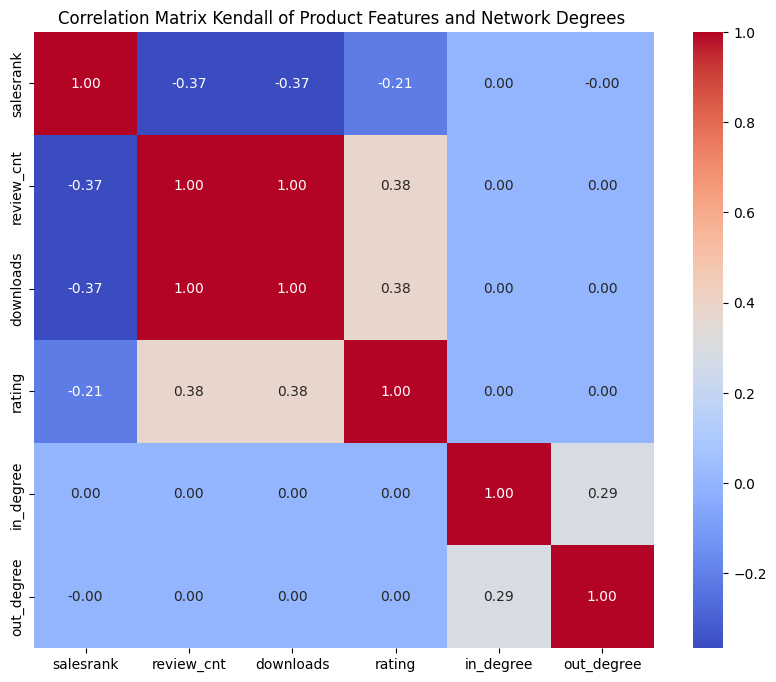

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_kendall, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Kendall of Product Features and Network Degrees ')
plt.show()

Dari hasil yang didapatkan dengan menggunakan metode Kendall terlihat bahwa ada:
- Hubungan yang sangat kuat (bernilai +1) antara review_cnt downloads. 
- Salesrank berkorelasi moderat (bernilai -0.37) dengan review_cnt, downloads dan berkorelasi lemah (bernilai -0.21) dengan rating ini menandakan bahwa salesrank memiliki jumlah review, downloads yang banyak tetapi mempunyai rating yang menegah.
- Rating berkorelasi moderat (bernilai 0.38) dengan review_cnt, downloads menandakan bahwa rating memiliki jumlah review, downloads yang banyak
- Tidak ada hubungan antar in_degree dan out_degree dengan salesrank, jumlah review, atau rating ini menandakan bahwa kedua atribut tersebut tidak terlalu berkaitan langsung dengan salesrank, jumlah review, atau rating pada produk.

In [12]:
df_products_spearman = df_products.copy()

correlation_matrix_spearman= df_products_spearman[['salesrank', 'review_cnt', 'downloads', 'rating', 'in_degree', 'out_degree']].corr(method='spearman')

print("Correlation Matrix Spearman:")
print(correlation_matrix_spearman)

Correlation Matrix Spearman:
            salesrank  review_cnt  downloads    rating  in_degree  out_degree
salesrank    1.000000   -0.498403  -0.497967 -0.292464   0.000267   -0.001220
review_cnt  -0.498403    1.000000   0.999274  0.524366   0.002871    0.002393
downloads   -0.497967    0.999274   1.000000  0.524597   0.002674    0.002244
rating      -0.292464    0.524366   0.524597  1.000000   0.002457    0.000046
in_degree    0.000267    0.002871   0.002674  0.002457   1.000000    0.336124
out_degree  -0.001220    0.002393   0.002244  0.000046   0.336124    1.000000


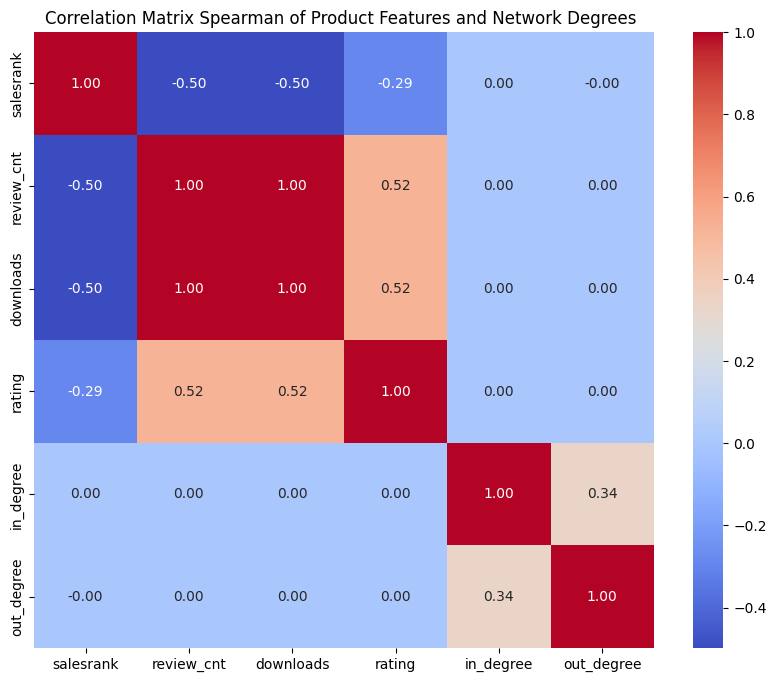

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Spearman of Product Features and Network Degrees ')
plt.show()

Dari hasil yang didapatkan dengan menggunakan metode Spearman terlihat bahwa ada:
- Masih mempertahankan hubungan yang sangat kuat (bernilai +1) antara review_cnt downloads. 
- Korelasi salesrank meningkat dibandingkan dengan metode Kendall dan mendekati kategori kuat (bernilai -0.50) dengan review_cnt, downloads dan berkorelasi lemah (bernilai -0.29) dengan rating ini menandakan bahwa salesrank memiliki jumlah review, downloads yang banyak tetapi mempunyai rating yang menegah.
- Korelasi rating meningkat dibandingkan dengan metode Kendall dan berkorelasi kuat (bernilai 0.52) dengan review_cnt, downloads menandakan bahwa rating memiliki jumlah review, downloads yang banyak.
- Tetap Tidak ada hubungan antar in_degree dan out_degree dengan salesrank, jumlah review, atau rating ini menandakan bahwa kedua atribut tersebut tidak terlalu berkaitan langsung dengan salesrank, jumlah review, atau rating pada produk.

2. Hitung statistics co-purchsing (in-degree, out-degree) untuk masing-masing group.

In [14]:
df_products_no_id = df_products.drop(columns=['id'])
df_products_no_id.describe()

,salesrank,review_cnt,downloads,rating,in_degree,out_degree
count,2.591670e+05,259167.000000,259167.000000,259167.000000,259167.000000,259167.000000
mean,4.955061e+05,14.000895,13.750589,3.158454,4.711290,4.711287
std,5.750585e+05,72.878967,69.013924,2.019447,5.708299,0.951783
min,-1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.191100e+04,0.000000,0.000000,0.000000,2.000000,5.000000
50%,3.031550e+05,2.000000,2.000000,4.000000,3.000000,5.000000
75%,6.778710e+05,8.000000,7.000000,5.000000,6.000000,5.000000
max,3.793303e+06,5545.000000,4995.000000,5.000000,420.000000,5.000000
